In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import tensorflow as tf
import tensorflow_probability as tfp

import warnings # the warning spam is pointless and annoying
warnings.simplefilter(action="ignore", category=FutureWarning)

Populating the interactive namespace from numpy and matplotlib


# Automatic Differentiation

## Methods for computing derivatives:

  1. Finite differences
  $$f'(x) \approx \frac{f(x + h) - f(x)}{h}$$
    * Not exact, introduces discretization error (depends on $h$)
    * Well studied
  2. Symbolic derivatives
    * result is an expression
    * expressions grow too large to be practical
  3. Automatic differentiation
    * Does not produce a 'formula', outputs are floating point numbers
    * No discretization error
    * Works by creating a DAG for a program, side effect is that the graph can be used to speed computations up on hardware (e.g., GPU).

# Programs as DAGs

## Example
$$L(u) = \tanh(wu + b)$$

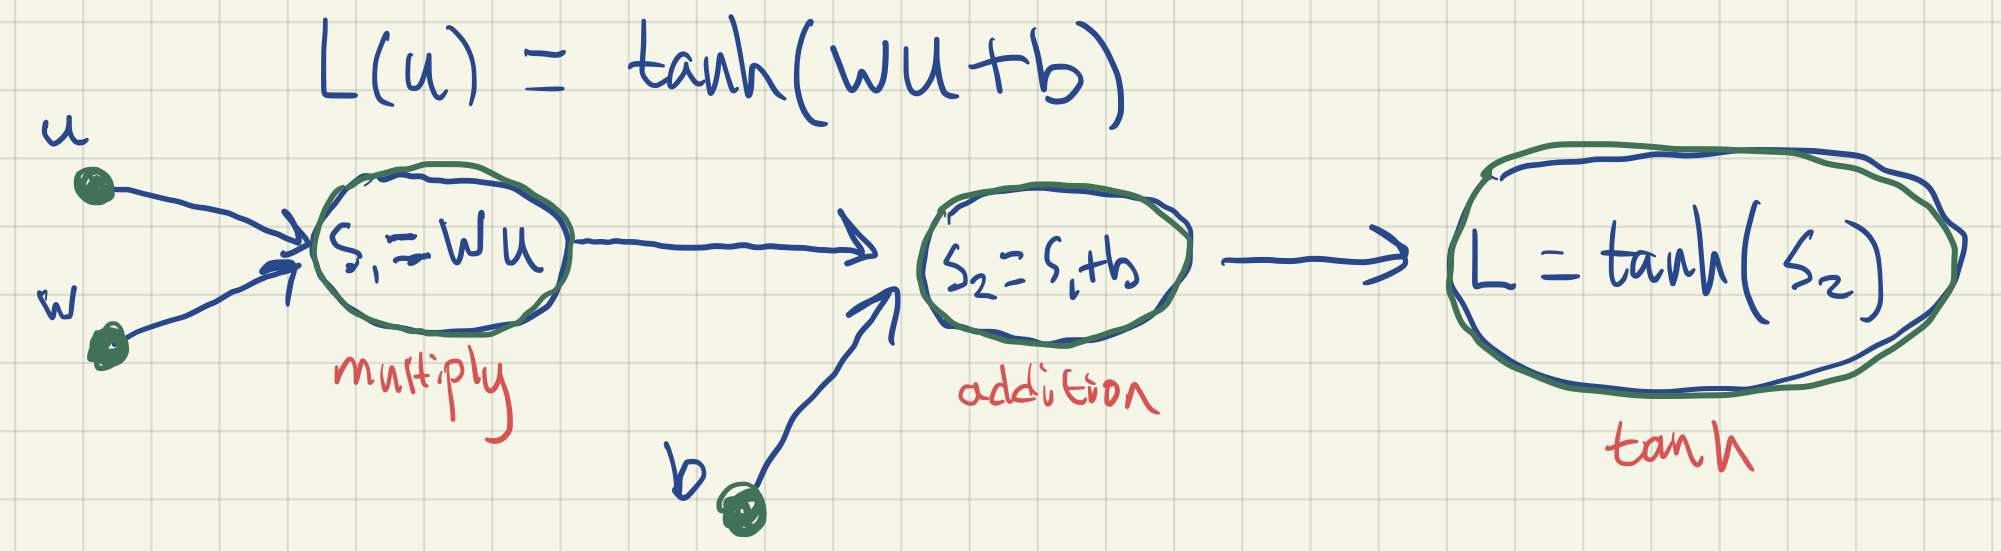

## Chain rule
Example:
$$ f(x, y, t): \mathbb{R}^3 \to \mathbb{R}$$
Total derivative (orbital derivative)
$$ \frac{d}{dt}f(x(t), y(t), t) = 
\frac{\partial f}{\partial t}
+\frac{\partial f}{\partial x}\frac{\partial x}{\partial t} 
+ \frac{\partial f}{\partial y}\frac{\partial y}{\partial t}$$

## Back Propagation:
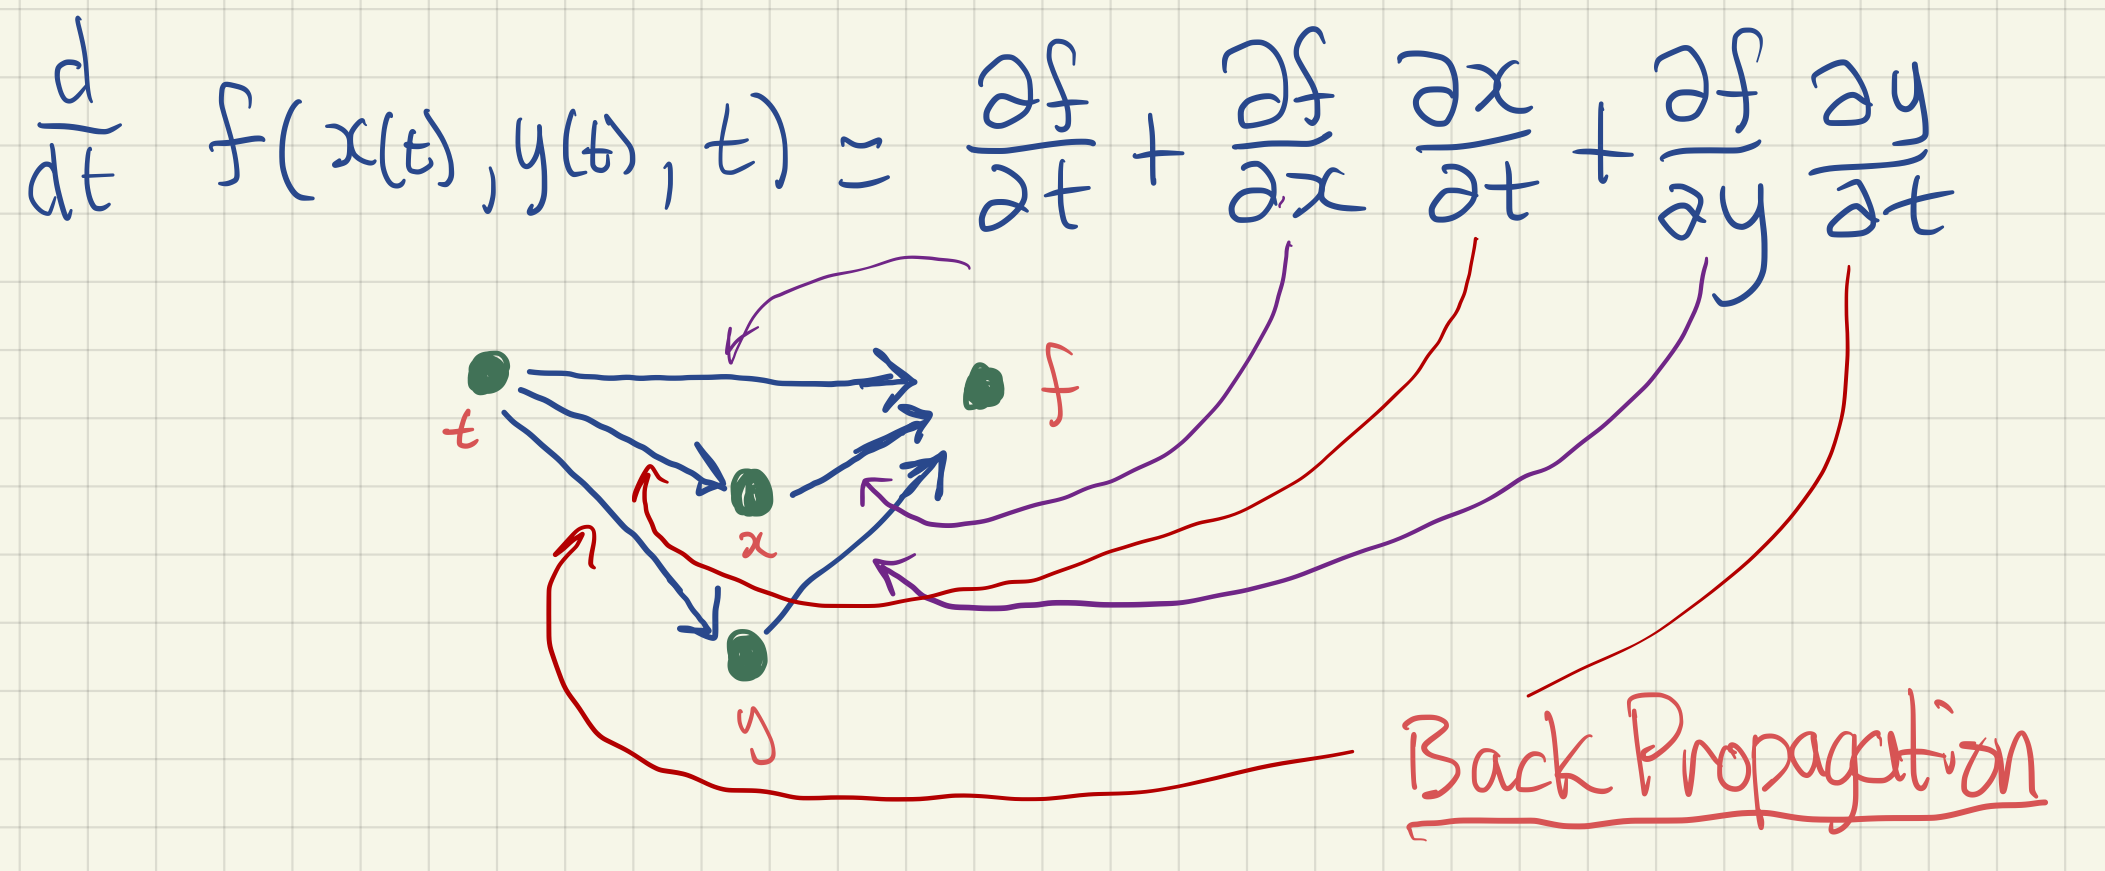

# Data structure for a node in a DAG to perform automatic differentiation

## Node:
  * parents: `list` of pointers to input nodes
  * function: maps `input` to `output`
  * autodiff function: maps `input`, `output`, and `grad_L_output` to `grad_L_input`
  

## Example: tanh node
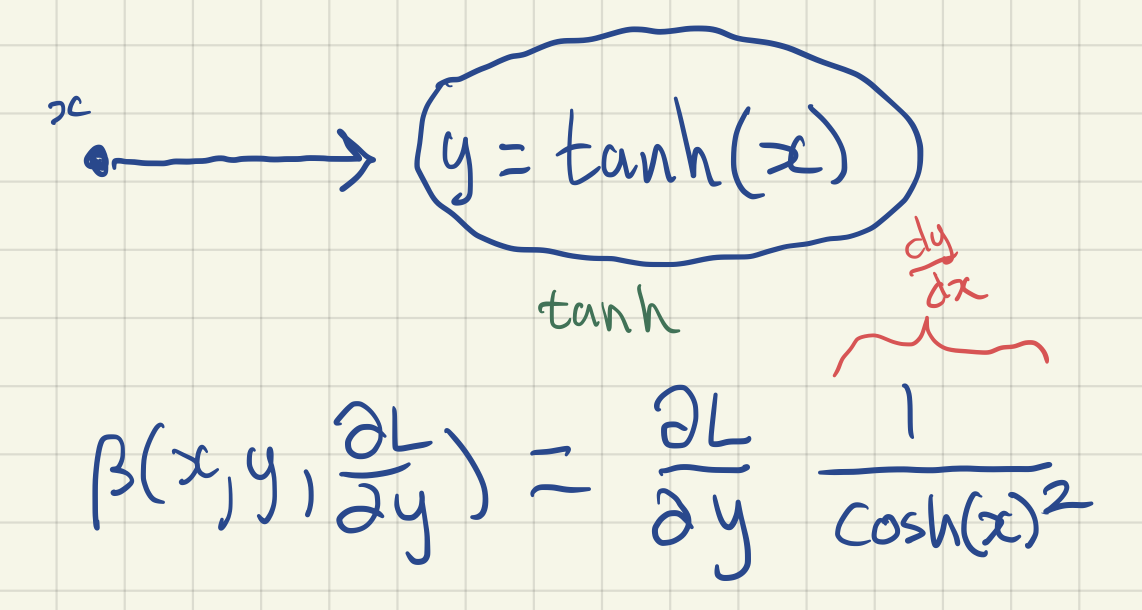

## Example: addition node
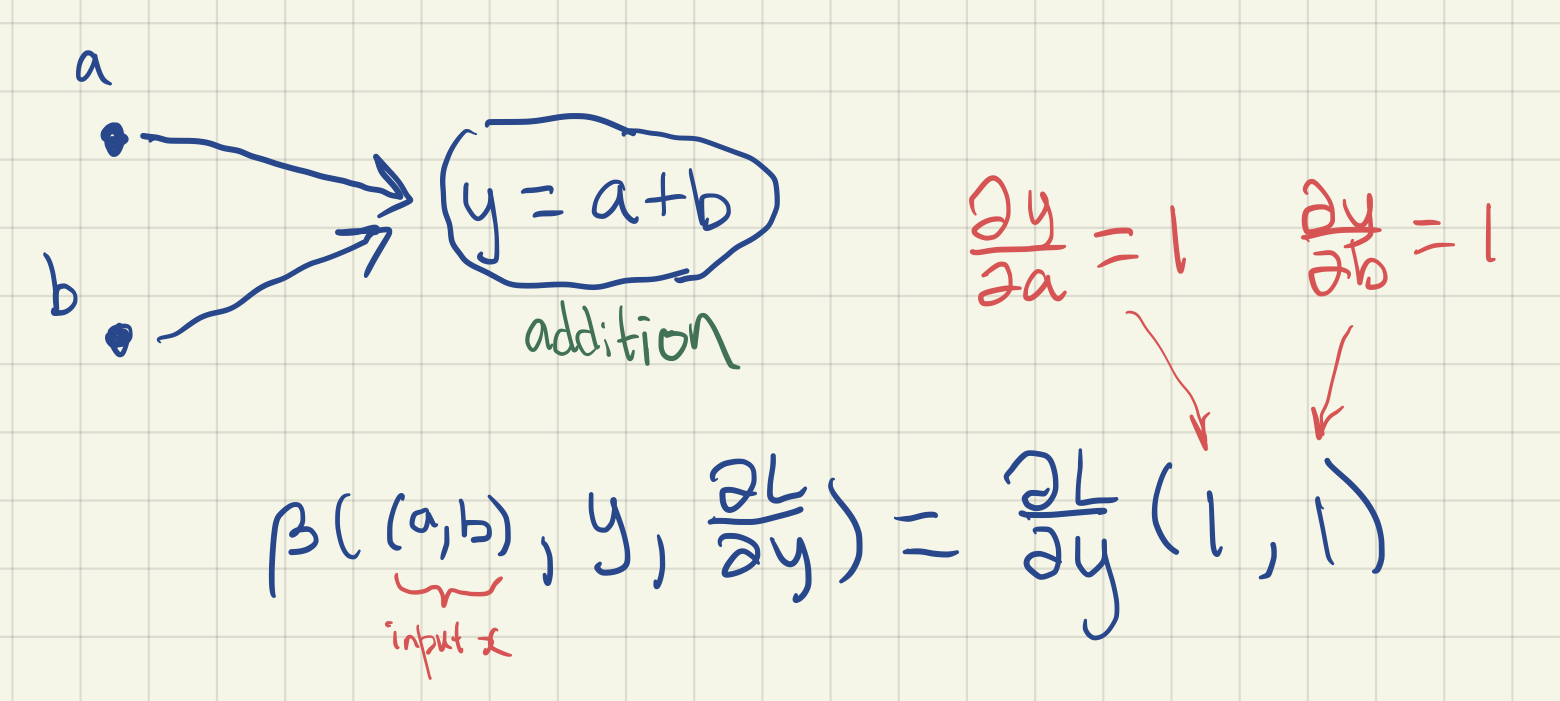

## Example: multiplication node
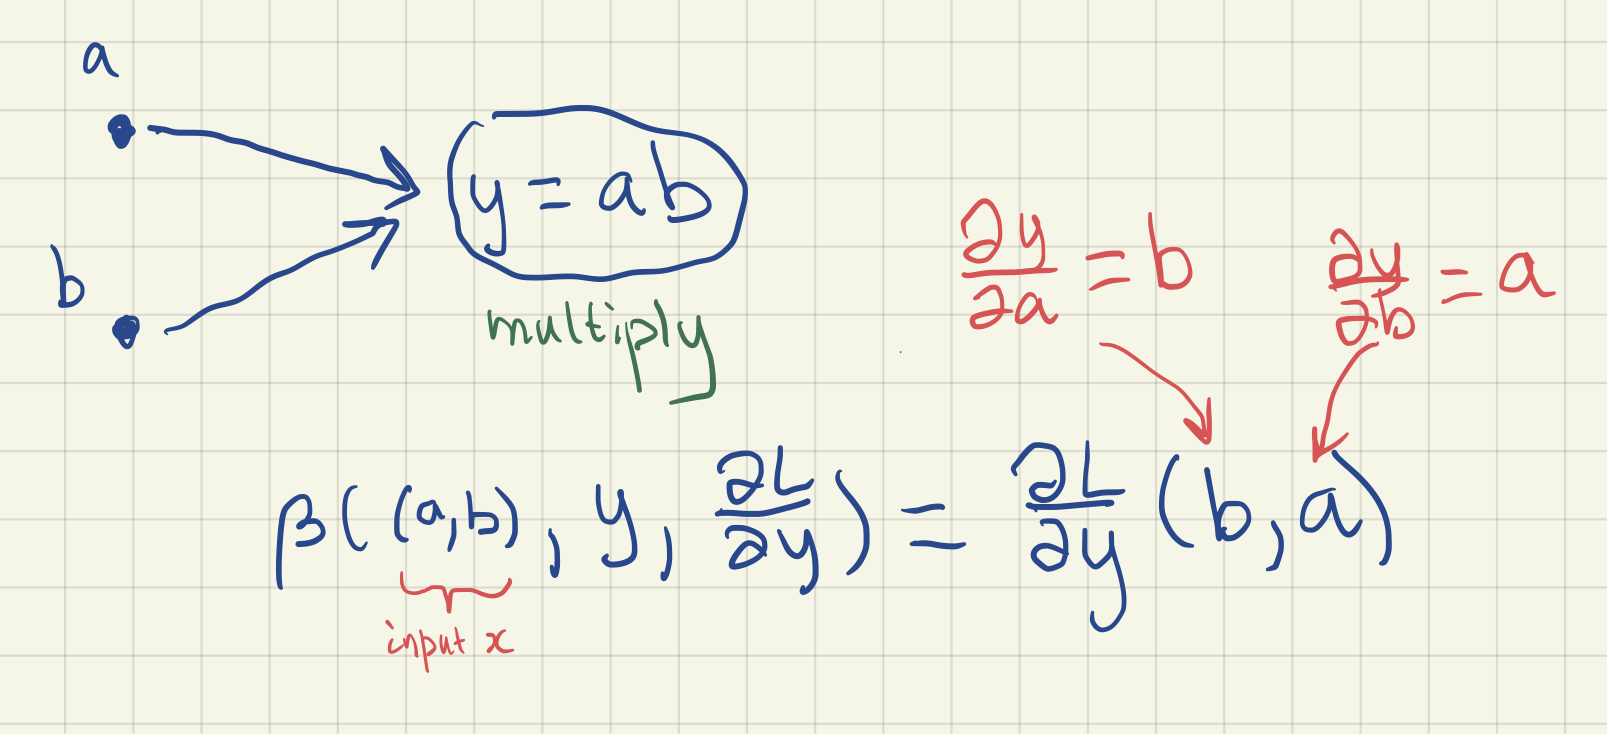

# Example:

$$f(a, b, c) = a\sin(\frac{b^2}{b + 5} + \cos(c))$$


In [2]:
a = tf.Variable(0.5)
b = tf.Variable(1.0)
c = tf.Variable(0.0)
with tf.GradientTape() as tape:
    tape.watch([a, b, c])
    f = a*tf.sin(b**2/(b + 5) + tf.cos(c))
grad = tape.gradient(f, [a, b, c])
[g.numpy() for g in grad]

[0.919445, 0.060075082, -0.0]

# Example: something very simple

$$f(a) = (a - 2)^2$$

$$f'(a) = 2(a-2)$$

$$a_n = a_{n-1} - \frac{df}{da}r $$

In [3]:
# tf.keras.backend.set_floatx('float64')

N_gd_steps = 5000
learning_rate = 0.1
optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

a = tf.Variable(0.5)
# @tf.function()  ## uncomment this to make it run faster
def optimize():
    for _ in tf.range(N_gd_steps):
        with tf.GradientTape() as tape:
            tape.watch([a]) ## must tell Tensorflow what trainable variables to use for gradients
            f = (a - 2.0)**2
        grad = tape.gradient(f, [a]) ## compute the gradient
        optimizer.apply_gradients( ## this takes one step of gradient descent to change the trainable prameters
            zip(grad, [a])) 
    return a
optimize()

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9999998>

In [4]:
## example of what `zip` does
z = zip([1, 1, 1], [2, 2, 2])
[zi for zi in z]

[(1, 2), (1, 2), (1, 2)]